<table class="table table-bordered">
    <tr>
    <th style="text-align:center;"><font size="4"> <br/>IS217 - Iris Dataset <br />Classification</font></th>
    </tr>
</table> 

### About Iris data
This data set consists of 50 samples from each of the three species of Iris flowers (<b>Iris setosa, Iris virginica</b> and <b>Iris versicolor</b>).<br>
For each sample the `length` and the `width` of the `sepals` and `petals`, in centimeters are recorded as features. <br>

<img align="left" src='https://drive.google.com/uc?export=view&id=1OmNrukzgJCfSiW_0B2Rp06BKguEMGClk' style="width: 700px; height: 250px;">



### Objective of the study
Use the classification techniques on the Iris dataset to be able to `classify` and `predict` the species.

### What is covered in the notebook:

 1. Reading <b>Iris</b> data from the web into a Pandas `DataFrame`
 2. Inspect the data and basic properties (EDA)
 3. Use Sample plots to show the relationship between variables
 4. Fit a DecisionTreeClassifier from `sklearn` library
 5. Visualise the `decision tree` splitting rules
 6. Printing `accuracy`, `confusion matrix`, and `classification report`.


### Import the required libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read data from URL into local storage

In [34]:
# Where we will download dataset from
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# The column names of our dataset. We need this because the website does not have these column names in the downloaded file.
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Read dataset from URL
data = pd.read_csv(url, names = col_names)

# Show datatype of dataset
print("data is of type: ",type(data))

data is of type:  <class 'pandas.core.frame.DataFrame'>


In [35]:
# Create a CSV file containing the dataset
data.to_csv('iris.csv', index = False)

In [3]:
# Show the first 5 rows in the dataset

# Write your code here:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Show the last 5 rows in the dataset

# Write your code here:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 2. EDA

### Checking for basic descriptive characteristics and missing values

In [5]:
# How many missing values are there?

# Write your code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### View Summary Statistics

In [6]:
# Show statistics for each numeric variable

# Write your code here:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Print the unique values for the categorical variable `class`

In [9]:
# Write your code here:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Print the frequency for each value in the categorical variable `class`

In [36]:
# Write your code here:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### 3. Let us study the relationship among variables with some visualisations
### a) Scatter plot of Petal Length vs Petal Width

In [98]:
# Import library for visusalization
import seaborn as sns

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

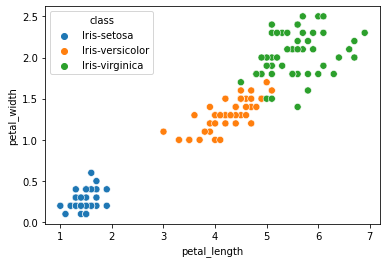

In [38]:
# Show scatter plot of petal_length (x-axis) vs petal_width (y-axis), with class shown as color.
# "s=50" sets the size of the dots.
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['class'], s=50)

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoa2dncC1mOFdhSFU' style="width: 80px; height: 80px;"><br /><br />
<b> Do we see natural grouping of points based on petal width and petal length? </b>

Put your answer here:
    Yes, dot colors are clearly segregated seperated by their length and width. 

    

### b) Scatter plot of Sepal Length vs Sepal Width

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

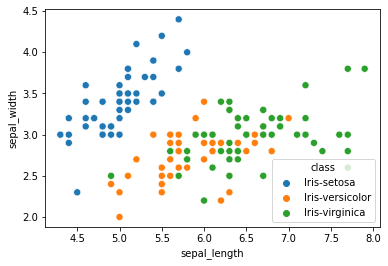

In [39]:
# Show scatter plot of Sepal Length vs Sepal Width
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'], hue=data['class'], s=50)

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoa2dncC1mOFdhSFU' style="width: 80px; height: 80px;"><br /><br />
<b> Which variables do you think differentiate the species better? </b>

Put your answer here:
    If petal length is better than sepal to indicate the class, we conclude that there is 
    1) Higher information gained from the petal variables 
    2) which results in a lower entropy
    3) splitting the data into parts 
    4) that are more easily classified into groups 
    5) or have less impurity within the subset 
    6) Or have more impurity in the subset 
    7) or have more homogeniety in split sets

### 4. Fitting the Decision tree
 - Import the sklearn library to instantiate a classifier object
 - Split the dataset into train and test
 - Fit the model and make test predictions
 - Print accuracy score
 - Print confusion matrix



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [99]:
# Import library to use Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Import library to split data into training and test sets
from sklearn.model_selection import train_test_split

# Import library to measure performance
from sklearn.metrics import accuracy_score

In [43]:
# Get predictor variables X from dataset
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Get target variable y from dataset
y = data['class']

`train_test_split()` API: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [44]:
# Create training and test sets, split up into predictor variables and target varaibles,
# with 20% of the dataset to be used for testing.
# "stratify = y" means we maintain proportion of classes in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 1)

In [45]:
# Show first 5 rows of X_train
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
47,4.6,3.2,1.4,0.2
141,6.9,3.1,5.1,2.3
90,5.5,2.6,4.4,1.2
64,5.6,2.9,3.6,1.3


In [46]:
# Show first 5 rows of y_train
y_train.head()

21         Iris-setosa
47         Iris-setosa
141     Iris-virginica
90     Iris-versicolor
64     Iris-versicolor
Name: class, dtype: object

In [47]:
# Show dimensions (number of rows and columns) of X_train
X_train.shape

(120, 4)

In [48]:
# Show dimensions (number of rows and columns) of y_train
y_train.shape

(120,)

In [49]:
# Show dimensions (number of rows and columns) of X_test
X_test.shape

(30, 4)

In [50]:
# Show dimensions (number of rows and columns) of y_test
y_test.shape

(30,)

`DecisionTreeClassifier` API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [51]:
# Build a Decision Tree model,
# using entropy as the measure for choosing nodes and branches,
# and with a maximum tree depth of 3 (i.e. 3 branches deep)
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)

`fit()` function API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

In [52]:
# Give training set for the DT to learn from

dt.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [53]:
# Give the test set to the DT, which returns its predicted answers
y_pred = dt.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

### 5. Visualising the Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

The below functions generate a graphical representation of the decison tree using the __'Graphviz'__ package. 
<br/>A graph is generated and written to an output file in 'DOT' format, which is then rendered and saved to a PNG format. DOT is a graph description language.

Parameters values can be set to render customised decision tree -<br>
e.g : `max_depth` - Here we have set it to 3. If we leave it to `default = None`, a full tree is generated.
<br/>Refer to the link above for details on other options that can be set.


### For executing the code below, you will need to install pydotplus.
#### In the Anaconda Prompt window (for Windows OS) or Terminal window (for Mac OS), type: <br />
`conda install -c conda-forge pydotplus`

In [54]:
# Import libraries to visualize DT
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image

# Names of features (independent variables)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Generate the visualization of the DT, and write into the file 'irisTree.png'
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                    feature_names = feature_cols,  
                    filled = True, rounded = True,  
                    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('irisTree.png') 
Image(graph.create_png())

### How to read the produced diagram:
### At the top of each non-leaf node, the expression is the question asked at that node,
### e.g. "petal_width <= 0.75". This question is used to further split up the data in the
### training set, to reach the nodes lower in the tree.
### Next line is the entropy at that node.
### Next line is the number of samples in the training set when reaching that node.
### Next line is the number of samples in each class when reaching that node.

ModuleNotFoundError: No module named 'pydotplus'

### If you can't install pydotplus, alternatively, you can use the below code to visualize the decision tree. 




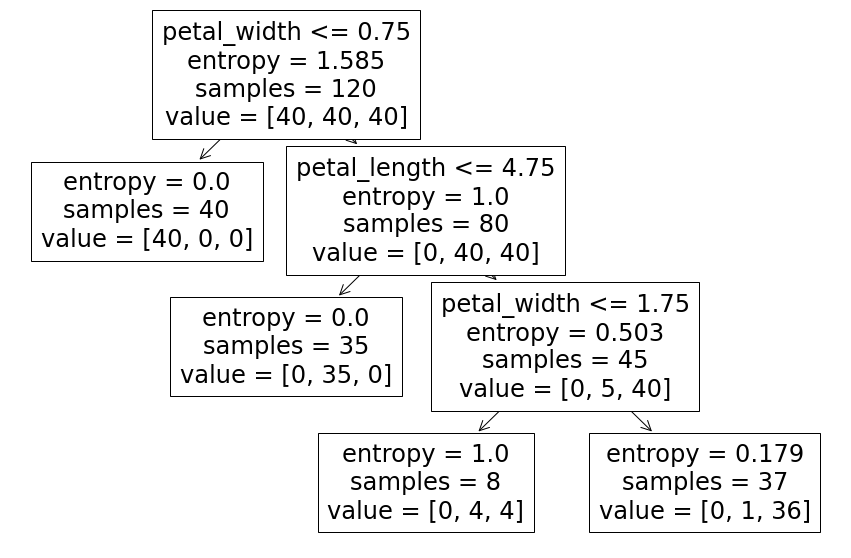

In [55]:
# Import libraries to show DT as a plot
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Names of features (independent variables)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Generate a plot showing the DT
plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train), feature_names = feature_cols)
plt.show()

### How to read the produced diagram:
### At the top of each non-leaf node, the expression is the question asked at that node,
### e.g. "petal_width <= 0.75". This question is used to further split up the data in the
### training set, to reach the nodes lower in the tree.
### Next line is the entropy at that node.
### Next line is the number of samples in the training set when reaching that node.
### Next line is the number of samples in each class when reaching that node.
# Value = [blue dot, orange dot, green dot]

In [57]:
# Show all class names
dt.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 6. Accuracy, Confusion Matrix and Classification Report

### a) Printing the Prediction Accuracy
<b>In classification Accuracy is calculated as the (sum of correct predictions / total number of predictions) <b/>

In [61]:
# Show accuracy of labels predicted, rounded to 2 decimal places
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,2)

0.97

### b) Printing the Confusion Matrix

The confusion Matrix is simply a square matrix that reports the counts of <b>`true positive, true negative, false positive and false negative`</b> predictions of a classifier.

https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

In [62]:
# Import library to show confusion matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(cnf_matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [63]:
# Show confusion matrix with each row and column labelled
confusion_test_df = pd.DataFrame(cnf_matrix, columns = [ 'Iris-setosa_pred', 'Iris-versicolor_pred', 'Iris-virginica-pred']\
                      , index =  [ 'Iris-setosa_act', 'Iris-versicolor_act', 'Iris-virginica_act'])
confusion_test_df

,Iris-setosa_pred,Iris-versicolor_pred,Iris-virginica-pred
Iris-setosa_act,10,0,0
Iris-versicolor_act,0,10,0
Iris-virginica_act,0,1,9


### c) Printing the Classification Report

In [66]:
# Import library to generate classification report
from sklearn.metrics import classification_report

# Get all possible values for the categorical variable 'class'
class_labels = data['class'].unique()

# Show classification report
print(classification_report(y_test, y_pred, target_names=class_labels))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Variable Importance <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [67]:
# Show the GINI importance of each feature
vi = dt.feature_importances_
print(vi)

[0.         0.         0.32668254 0.67331746]


In [68]:
# Show the GINI importance of each feature in an easier to read format
n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

sepal_length   : 0.0
sepal_width   : 0.0
petal_length   : 0.327
petal_width   : 0.673


**Optional code - Plotting the feature importance**

<AxesSubplot:>

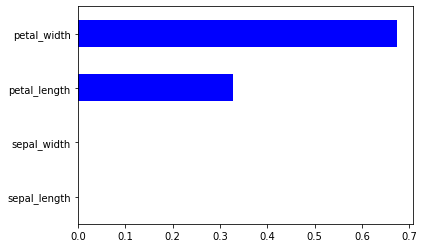

In [69]:
# Create a Series with the feature importances
feat_importances = pd.Series(vi, index = feature_cols)

# Sort the Series
sorted_feat_importances = feat_importances.sort_values()

# Create a horizontal bar plot showing feature importance
sorted_feat_importances.plot(kind='barh', color='blue')

## Practice 

We will now try to build another decision tree for predicting whether a patient is more likely to get a diabete or not. 

[This dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Features are:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [89]:
# Read dataset from CSV 
df = pd.read_csv("diabetes.csv")

# Show dimensions (number of rows and columns) of dataset
print(df.shape)

# Show first 5 rows of dataset
df.head()
df.columns

(768, 9)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [91]:
# Use shortened variable names
df.columns = ['pregnant', 'Glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df.head()

,pregnant,Glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
# Show all possible values for 'label', and how frequently they occur
df['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

### Q1. What is the f1-score for class '0' (label=0) given the following conditions?

- For `train_test_split,` please split your data by 7:3, so that you use 70% of the data as training and 30% for testing. Also, please use `random_state=1,` and do not use any stratification. 
- For `DecisionTreeClassifier`, please use `max_depth = 3, random_state = 1`
- For `classification_report`, please exclude the `target_names` as a parameter

In [103]:
# Write your code here:
X = df.drop("label", axis = 1)
y = df['label']

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 1)
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)


from sklearn.metrics import classification_report

class_labels = df['label'].unique()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Your answer to Q1: 0.82

### Q2. What is the condition of the root node of the decision tree model? 

To answer this question, please visualize the decision tree model. 


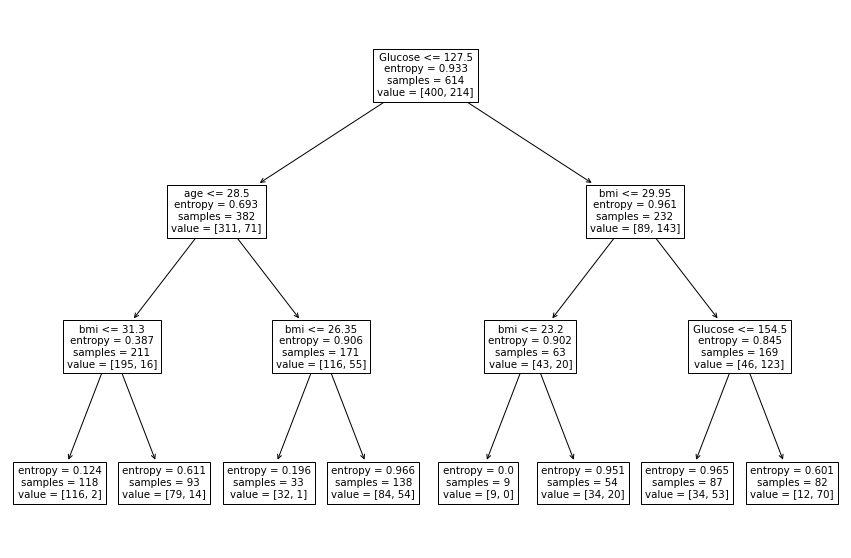

In [104]:
# Write your code here:
feature_cols = ['pregnant', 'Glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

# Generate a plot showing the DT
plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train), feature_names = feature_cols)
plt.show()

Your answer to Q2: Glucose ≤ 127.5
